## Part 1
### Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import time

# Read datasets

In [38]:
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")

In [39]:
fake.shape

(23481, 4)

In [40]:
true.shape

(21417, 4)

# Data cleaning and preparation

In [41]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [42]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape
data_archived_one=list()
data_archived=list()

In [43]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [44]:
# Check the data
data.head()

,title,text,subject,date,target
0,"REPORT: ANTI-TRUMP, Open-Borders Clooney’s No ...",Actor and immigration activist George Clooney ...,politics,"Jul 6, 2017",fake
1,MUST WATCH VIDEO: WATCH WHAT TRACK & FIELD OLY...,Usain Bolt was mid-interview when our National...,left-news,"Aug 16, 2016",fake
2,White House pledges aid to help Chicago quell ...,WASHINGTON/CHICAGO (Reuters) - President Donal...,politicsNews,"January 25, 2017",true
3,MAINE DEMOCRAT Congressman Makes DEATH THREAT ...,Maine State Representative Scott Hamann (D) is...,politics,"Jul 12, 2017",fake
4,Catalan leader's farmhouse pact to make last s...,"BARCELONA/GIRONA, Spain (Reuters) - Twenty-fou...",worldnews,"November 8, 2017",true


In [45]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,"REPORT: ANTI-TRUMP, Open-Borders Clooney’s No ...",Actor and immigration activist George Clooney ...,politics,fake
1,MUST WATCH VIDEO: WATCH WHAT TRACK & FIELD OLY...,Usain Bolt was mid-interview when our National...,left-news,fake
2,White House pledges aid to help Chicago quell ...,WASHINGTON/CHICAGO (Reuters) - President Donal...,politicsNews,true
3,MAINE DEMOCRAT Congressman Makes DEATH THREAT ...,Maine State Representative Scott Hamann (D) is...,politics,fake
4,Catalan leader's farmhouse pact to make last s...,"BARCELONA/GIRONA, Spain (Reuters) - Twenty-fou...",worldnews,true


In [46]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Actor and immigration activist George Clooney ...,politics,fake
1,Usain Bolt was mid-interview when our National...,left-news,fake
2,WASHINGTON/CHICAGO (Reuters) - President Donal...,politicsNews,true
3,Maine State Representative Scott Hamann (D) is...,politics,fake
4,"BARCELONA/GIRONA, Spain (Reuters) - Twenty-fou...",worldnews,true


In [47]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,actor and immigration activist george clooney ...,politics,fake
1,usain bolt was mid-interview when our national...,left-news,fake
2,washington/chicago (reuters) - president donal...,politicsNews,true
3,maine state representative scott hamann (d) is...,politics,fake
4,"barcelona/girona, spain (reuters) - twenty-fou...",worldnews,true


Series([], Name: text, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

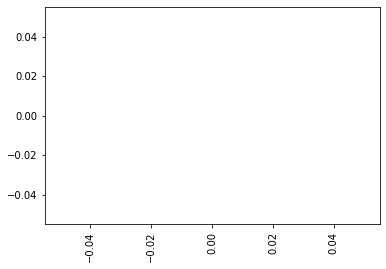

In [74]:

classes=['Government News','Middle-east','News','US_News','left-news','politics','politicsNews','Worldnews']
for index,x in enumerate(classes):
    data_archived.append(data[data['subject'] == x])
    
selected_class = 7
data_archived_one = data[data['subject'] == classes[selected_class]]
data_archived_one.head()

value_count=data_archived_one.count


In [49]:
print(data_archived_one.shape)

(6841, 3)


target
fake    6841
Name: text, dtype: int64


c:\engine\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


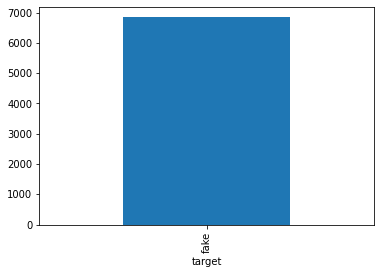

In [56]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data_archived_one['text'] = data_archived_one['text'].apply(punctuation_removal)



In [51]:
# Check
data_archived_one.head()

,text,subject,target
0,actor and immigration activist george clooney ...,politics,fake
3,maine state representative scott hamann d is c...,politics,fake
7,could someone please explain this i honestly d...,politics,fake
12,if denied by congress it would have profound ...,politics,fake
13,,politics,fake


In [52]:
# Removing stopwords
import os
base_dir = (r"C:\Users\\")
user = os.getlogin()
filename =(r"\AppData\Roaming\nltk_data\corpora\stopwords.zip")
fullpath = (base_dir + user + filename)

import nltk
if fullpath:
    print('File Already Exist : ',fullpath)
else:
    nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

data_archived_one['text'] = data_archived_one['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

File Already Exist :  C:\Users\\Rashid Rao\AppData\Roaming\nltk_data\corpora\stopwords.zip


c:\engine\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
data_archived_one.head()

,text,subject,target
0,actor immigration activist george clooney move...,politics,fake
3,maine state representative scott hamann clearl...,politics,fake
7,could someone please explain honestly think ac...,politics,fake
12,denied congress would profound implications us...,politics,fake
13,,politics,fake


# Basic data exploration

subject
politics    6841
Name: text, dtype: int64


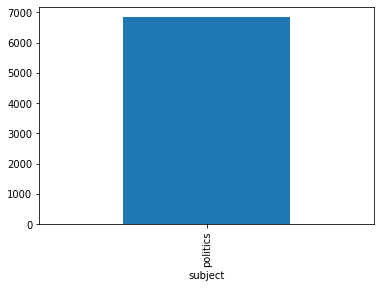

In [54]:
# How many articles per subject?
print(data_archived_one.groupby(['subject'])['text'].count())
data_archived_one.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    6841
Name: text, dtype: int64


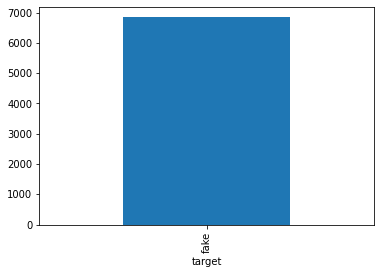

In [55]:
# How many fake and real articles?
print(data_archived_one.groupby(['target'])['text'].count())
data_archived_one.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data_archived_one[data_archived_one["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data_archived_one[data_archived_one["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

In [ ]:
# Most frequent words in fake news
counter(data_archived_one[data_archived_one["target"] == "fake"], "text", 20)

In [ ]:
# Most frequent words in real news
counter(data_archived_one[data_archived_one["target"] == "true"], "text", 20)

# Modeling

In [ ]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Peparing the data

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data_archived_one['text'], data_archived_one.target, test_size=0.2, random_state=42)

In [ ]:
dct = dict()
dct_time = dict()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

start = time.time()
model = pipe.fit(X_train, y_train)
stop = time.time()
print(f"Training time for Naive Bayes: {round((stop - start),2)}s")
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Naive Bayes'] = round((stop - start),2)

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic regression

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

start = time.time()

# Fitting the model
model = pipe.fit(X_train, y_train)

stop = time.time()
print(f"Training time for Logistic Regression: {round((stop - start),2)}s")

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Logistic Regression'] = round((stop - start),2)

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
start = time.time()
# Fitting the model
model = pipe.fit(X_train, y_train)
stop = time.time()
print(f"Training time for Decision Tree : {round((stop - start),2)}s")

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Decision Tree'] = round((stop - start),2)

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
start = time.time()
model = pipe.fit(X_train, y_train)
stop = time.time()
print(f"Training time for Random Forest : {round((stop - start),2)}s")

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Random Forest'] = round((stop - start),2)

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])
start = time.time()
model = pipe.fit(X_train, y_train)
stop = time.time()
print(f"Training time for SVM : {round((stop - start),2)}s")


prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['SVM'] = round((stop - start),2)

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

start = time.time()
model = pipe.fit(X_train, y_train)

stop = time.time()
print(f"Training time for KNN : {round((stop - start),2)}s")

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['KNN'] = round(accuracy_score(y_test, prediction)*100,2)

dct_time['KNN'] = round((stop - start),2)

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

start = time.time()
model = pipe.fit(X_train, y_train)

stop = time.time()
print(f"Training time for Passive Aggresive : {round((stop - start),2)}s")

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Passive Aggresive'] = round(accuracy_score(y_test, prediction)*100,2)
dct_time['Passive Aggresive'] = round((stop - start),2)

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
# Change color of each bar
plt.bar(list(dct.keys()),list(dct.values()), color=['firebrick', 'green', 'blue', 'black', 'red','green','gray'])

def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0008*y[i],y[i],ha = 'center',rotation=0)
        
addtext(list(dct.keys()),list(dct.values()))

max_value_dct = math.floor(max(dct.values()))
min_value_dct = math.floor(min(dct.values()))
plt.ylabel('Testing Accuracy')

plt.title('Comparing Different Models')
plt.ylim(min_value_dct-2,max_value_dct+3)

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)

# Comparing Time Taken by Different Models

In [ ]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(8,7))
# Change color of each bar
plt.bar(list(dct_time.keys()),list(dct_time.values()), color=['firebrick', 'green', 'blue', 'black', 'red','orange','gray'])

def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0016*y[i],y[i],ha = 'center',rotation=0)
    
max_value_dct_time = math.floor(max(dct_time.values()))
min_value_dct_time = math.floor(min(dct_time.values()))
                       
addtext(list(dct_time.keys()),list(dct_time.values()))

plt.title('Training Time for Different Models')
plt.ylim(min_value_dct_time-10,max_value_dct_time+20)
plt.ylabel('Time in Seconds')

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)
